In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl


# Loading maps

In [112]:
map_oceans = plt.imread("../maps/LOTR_MAPS_oceans.png")
map_rivers = plt.imread("../maps/LOTR_MAPS_rivers.png")
map_hills = plt.imread("../maps/LOTR_MAPS_hills.png")
map_mountains = plt.imread("../maps/LOTR_MAPS_mountains.png")
map_ridges = plt.imread("../maps/LOTR_MAPS_ridges.png")

In [113]:
wmap_oceans = extract_weightmap(map_oceans)
wmap_rivers = extract_weightmap(map_rivers)
wmap_hills = extract_weightmap(map_hills)
wmap_mountains = extract_weightmap(map_mountains)
wmap_ridges = extract_weightmap(map_ridges)

In [114]:
wmap_land = invert_weightmap(wmap_oceans)

In [115]:
def extract_weightmap(im):
    "selects the non white part of the image"
    ww = np.zeros(shape=im.shape[:2])
    ww[np.where(im.sum(axis=2) < 4.)] = 1.
    return ww

def invert_weightmap(ww):
    return 1 - ww

# Constructing height map

In [116]:
np.random.seed(5)

In [117]:
sh = wmap_land.shape
num = sh[0] * sh[1]
values = np.random.uniform(size=num)

In [118]:
canvas = np.zeros(shape = wmap_land.shape)
canvas = values.reshape(canvas.shape)

In [119]:
ridge_heights = 5000
mountain_heights = 2000
hill_heights = 500
land_heights = 100

In [132]:
raw_canvas = np.zeros(shape = wmap_land.shape)
raw_canvas = values.reshape(raw_canvas.shape)
canvas = raw_canvas * wmap_land
canvas = ((raw_canvas * wmap_land * land_heights) +
         (raw_canvas * wmap_hills * hill_heights) +
         (raw_canvas * wmap_mountains * mountain_heights) +
         (raw_canvas * wmap_ridges * ridge_heights)) 

(array([7.330764e+06, 1.613850e+05, 1.548660e+05, 4.732000e+03,
        4.672000e+03, 4.706000e+03, 4.809000e+03, 4.711000e+03,
        4.647000e+03, 4.708000e+03]),
 array([1.00000000e-03, 7.09996197e+02, 1.41999139e+03, 2.12998659e+03,
        2.83998179e+03, 3.54997699e+03, 4.25997218e+03, 4.96996738e+03,
        5.67996258e+03, 6.38995778e+03, 7.09995297e+03]),
 <BarContainer object of 10 artists>)

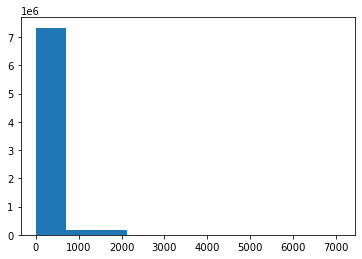

In [130]:
plt.hist(canvas.flatten())

In [ ]:
def height_filter()

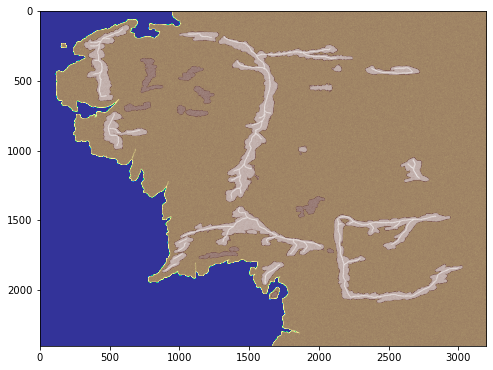

In [136]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(canvas + 0.001, cmap=plt.cm.terrain, norm=mpl.colors.LogNorm())